### EDA and Sentiment Analysis:

> - For Amazon's products reviews datasets available at 
    - https://snap.stanford.edu/data/web-Amazon.html
    - https://nijianmo.github.io/amazon/index.html#code
> - Steps performed:
    - EDA
    - Data Cleaning
    - Sentiment Analysis

In [1]:
# Importing required module:

import json
import nltk.sentiment

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

analyzer = nltk.sentiment.SentimentIntensityAnalyzer()

> - From the first dataset i.e., software_products dataset - performed the EDA to understand the whole raw dataset prior to sub-setting them due to their scale of the file, however once the desired outputs have been achieved, next would be to pass in the large datasets and merge them for the unified report or individual reports based on the requirements of the business and teams!

### Data Cleaning the raw dataset by removing unwanted variables using del_keys() function:

In [2]:
def del_key():
    with open('../datasets_raw/reviews_ori_data.json') as data_file:
        products_data = json.load(data_file)

        print(len(products_data['musical_instruments']))
        print(len(products_data['software_products']))
        print(len(products_data['office_products']))

    for item_ in products_data['musical_instruments']:

        for key_ in ['verified', 'reviewerName', 'reviewTime', 'unixReviewTime']:
            item_.pop(key_)

    with open('../datasets_output/musical_instruments_dir/musical_instruments_cleaned.json', 'w') as data_file:
        json.dump(products_data['musical_instruments'], data_file, indent=4)

del_key()

312
312
312


### EDA on above cleaned dataset:

In [3]:
# To view contents of cleaned dataset from del_keys() step:
musical_instruments_cleaned_ = pd.read_json('../datasets_output/musical_instruments_dir/musical_instruments_cleaned.json')
musical_instruments_cleaned_

,overall,reviewerID,asin,style,reviewText,summary,vote
0,5,A38M07PSQW4OR7,B00005ML71,{'Style:': ' Compact Sustain Pedal'},I got everything I expected out of my order fo...,Shipped fast and works exactly how I hoped!,NaN
1,5,A3USCQUVPVCBLH,B00005ML71,{'Style:': ' Volume Expression Pedal'},I use this while gigging with my MOX6. Sturdy...,Works Perfectly,3.0
2,5,A1C0O09LOLVI39,B00005ML71,{'Style:': ' Compact Sustain Pedal'},"I love it, I used this for my Yamaha ypt-230 a...",awesome,NaN
3,4,AJ5KAJAHEHA39,B00005ML71,{'Style:': ' Volume Expression Pedal'},works s it should and it doesn't weigh too muc...,good for the money,NaN
4,3,A2MDD1D5AUN6BB,B00005ML71,{'Style:': ' Volume Expression Pedal'},This pedal appeared to be of very good quality...,No right angle plug or removable cord,4.0
...,...,...,...,...,...,...,...
307,5,A21Y2AM6WWUUAI,B000068NTU,{'Size:': ' 1 Foot'},"Every Hosa cable I have owned works well, and ...",Just works,NaN
308,5,A39JMLMY96E8CP,B000068NTU,{'Size:': ' 20 Feet'},The cable is flawless and a great bargain.\nTh...,Works Great,NaN
309,3,A3NKOC7K8UHB9W,B000068NTU,{'Size:': ' 5 Feet'},Good cable not find fault so far hopefully wit...,oK,NaN
310,5,A2XDYUCICKEG1V,B000068NZG,{'Size:': ' 1 Foot'},DOES THE JOB FINE,Five Stars,NaN


In [4]:
# Number of rows and columns in cleaned dataset:
print(musical_instruments_cleaned_.shape)

(312, 7)


In [5]:
# Data types of each variables/columns:
print(musical_instruments_cleaned_.dtypes)

overall         int64
reviewerID     object
asin           object
style          object
reviewText     object
summary        object
vote          float64
dtype: object


In [6]:
# Descriptive summary of cleaned dataset:
print(musical_instruments_cleaned_.describe())

          overall     vote
count  312.000000  6.00000
mean     4.615385  4.00000
std      0.785410  1.67332
min      1.000000  2.00000
25%      4.000000  3.25000
50%      5.000000  4.00000
75%      5.000000  4.00000
max      5.000000  7.00000


In [7]:
# General information about cleaned dataset:
print(musical_instruments_cleaned_.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     312 non-null    int64  
 1   reviewerID  312 non-null    object 
 2   asin        312 non-null    object 
 3   style       309 non-null    object 
 4   reviewText  312 non-null    object 
 5   summary     312 non-null    object 
 6   vote        6 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 17.2+ KB
None


### Performing Sentiment Analysis:

In [8]:
users_review_text = []
products_id = []
sentiment_scores = []

with open('../datasets_output/musical_instruments_dir/musical_instruments_cleaned.json') as file:
    data = json.load(file)

    for item in data:
        # review text
        review_text = item['reviewText']
        # print(review_text.replace("\n\n", " ").replace("  ", " "))
        users_review_text.append(review_text.replace("\n\n", " ").replace("  ", " "))

        product_id = item['asin']
        products_id.append(product_id)

        # sentiment score
        scores = analyzer.polarity_scores(review_text)
        sentiment_score = scores['compound']

        sentiment_scores.append(sentiment_score)

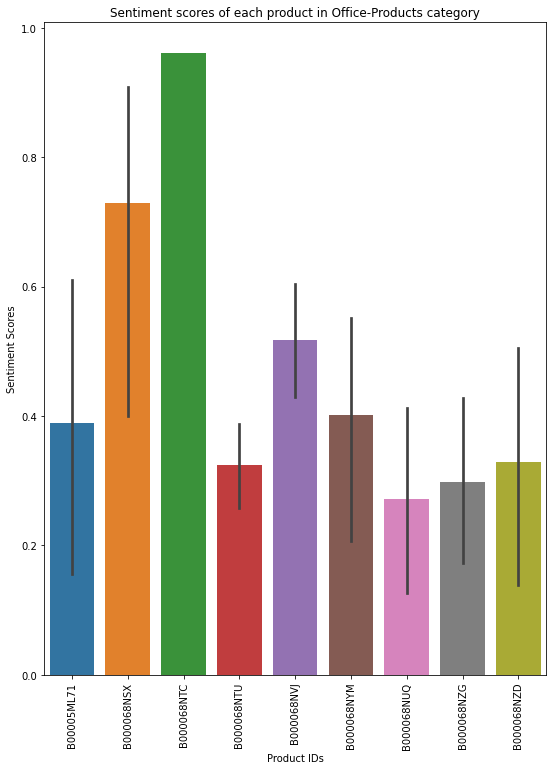

In [9]:
# To create bar graph for each product category:
bar_graph_data = {
    'x': products_id,
    'y': sentiment_scores
}

plt.figure(figsize=(9, 12))
sns.barplot(data=bar_graph_data, x='x', y='y')
plt.title("Sentiment scores of each product in Office-Products category")
plt.xlabel("Product IDs")
plt.ylabel("Sentiment Scores")
plt.xticks(rotation=90);
# plt.savefig('../datasets_output/musical_instruments_dir/musical_instruments_senti_graph.png')

In [10]:
# Compile data for Pandas DataFrame:
data = {
    'user_review': users_review_text,
    'product_id': products_id,
    'sentiment_score': sentiment_scores
}

# Create Pandas DataFrame:
reviews_df = pd.DataFrame(data)
reviews_df

,user_review,product_id,sentiment_score
0,I got everything I expected out of my order fo...,B00005ML71,0.7840
1,"I use this while gigging with my MOX6. Sturdy,...",B00005ML71,0.7579
2,"I love it, I used this for my Yamaha ypt-230 a...",B00005ML71,0.8957
3,works s it should and it doesn't weigh too muc...,B00005ML71,-0.3409
4,This pedal appeared to be of very good quality...,B00005ML71,0.0565
...,...,...,...
307,"Every Hosa cable I have owned works well, and ...",B000068NTU,0.4404
308,The cable is flawless and a great bargain.\nTh...,B000068NTU,0.7906
309,Good cable not find fault so far hopefully wit...,B000068NTU,0.8451
310,DOES THE JOB FINE,B000068NZG,0.2023


In [11]:
reviews_df.to_csv('../datasets_output/musical_instruments_dir/musical_instruments_sa_df.csv', index=None)

In [12]:
# To know how many reviews are there for each product_id variable:
print(reviews_df[['product_id']].value_counts())

product_id
B000068NTU    135
B000068NVJ     54
B000068NUQ     37
B000068NYM     22
B00005ML71     19
B000068NZG     18
B000068NZD     16
B000068NSX     10
B000068NTC      1
dtype: int64


In [13]:
# To know number of products in office_products category:
print("Number of products in Office-Products category:", len(reviews_df[['product_id']].value_counts()))

Number of products in Office-Products category: 9


In [14]:
# To compute the average (mean) of each product's sentiment score:
sentiment_avg_score = reviews_df.groupby('product_id').mean()[['sentiment_score']]  # returns df object

In [15]:
print(type(sentiment_avg_score))

<class 'pandas.core.frame.DataFrame'>


In [16]:
# To view the sentiment ave score:

sentiment_avg_score

,sentiment_score
product_id,
B00005ML71,0.389537
B000068NSX,0.729440
B000068NTC,0.960600
B000068NTU,0.324043
B000068NUQ,0.271157
B000068NVJ,0.517643
B000068NYM,0.401523
B000068NZD,0.328744
B000068NZG,0.298311


In [17]:
# Rounding off average scores:
print(sentiment_avg_score.round({'sentiment_score': 2}) * 100)

            sentiment_score
product_id                 
B00005ML71             39.0
B000068NSX             73.0
B000068NTC             96.0
B000068NTU             32.0
B000068NUQ             27.0
B000068NVJ             52.0
B000068NYM             40.0
B000068NZD             33.0
B000068NZG             30.0


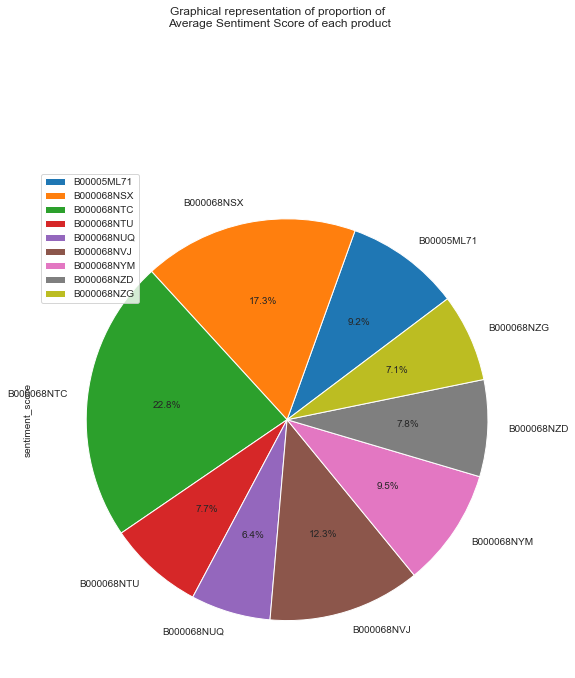

In [38]:
# To plot pie-chart for the sentiment_avg_score:

sns.set_style("whitegrid")
sentiment_avg_score.plot.pie(autopct="%.1f%%", 
                             subplots=True, 
                             startangle=37, 
                             figsize=(9,12),
                             title="Graphical representation of proportion of \n" + "Average Sentiment Score of each product");

#### Key insights from this pie-chart:
> - This pie-chart shows the proportion of each product w.r.t their average sentiment score.
> - The product_id B000068NTC has received highest reviews thus highest average sentiment score.
> - So the product_id B000068NUQ received lesser sentiment reaction
> - Please note pie-chart doesn't represent whether the sentiment score was positive or non-positive

### Summary:

> - I have done the EDA to understand the dataset to perform Sentiment Analysis.
> - From this Sentiment Analysis, helps to determine how each product or its sellers are performing:
    - The above 'sentiment_avg_score' computation shows information such as which products are doing well, below average or above average. 
> - These analysis will help understand the sales pattern and to further improvise on the business/sales to meet the KPIs.
> - This leads to the scope to build Text Classifier model for analysing the sentiment of the products review to help keep track of the business!